In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
layers = 12
df = pd.DataFrame()
BASE_DIR = "/content/drive/MyDrive/MESD/results/"

for layer in range(layers):
    file = BASE_DIR + f'hubertbase_perclass_{layer}.csv'
    data = pd.read_csv(file)
    data['layer'] = layer
    df = pd.concat([data, df], ignore_index=True)
df['accuracy'] = df['accuracy'].round(2)
df.head()

,class,accuracy,layer
0,anger,0.18,11
1,disgust,0.54,11
2,fear,0.19,11
3,happiness,0.48,11
4,sadness,0.24,11


In [3]:
newdf = pd.pivot(df, index='layer', columns='class', values='accuracy')
newdf

class,anger,disgust,fear,happiness,neutral,sadness
layer,,,,,,
0,0.00,0.35,0.08,1.00,0.04,0.15
1,0.55,0.62,0.15,0.74,0.21,0.03
2,0.48,0.77,0.00,0.63,0.71,0.15
3,0.52,0.69,0.19,0.70,0.46,0.06
4,0.55,0.69,0.15,0.70,0.46,0.06
5,0.58,0.69,0.23,0.52,0.43,0.21
6,0.67,0.46,0.31,0.52,0.50,0.18
7,0.30,0.65,0.27,0.59,0.36,0.33
8,0.36,0.35,0.42,0.52,0.36,0.30


[Text(0.5, 1.0, 'HubertBase Each Class Accuracy Via Layers')]

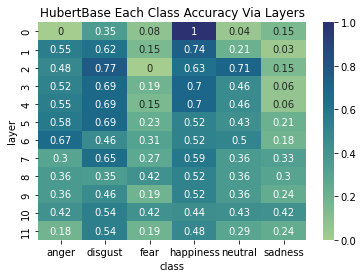

In [4]:
import seaborn as sns

sns.heatmap(newdf, annot=True, cmap="crest").set(title="HubertBase Each Class Accuracy Via Layers")

In [5]:
df = pd.DataFrame()
for layer in range(layers):
    file = BASE_DIR + f'wav2vec_perclass_{layer}.csv'
    data = pd.read_csv(file)
    data['layer'] = layer
    df = pd.concat([data, df], ignore_index=True)
df['accuracy'] = df['accuracy'].round(2)
df.head()

,class,accuracy,layer
0,anger,0.24,11
1,disgust,0.23,11
2,fear,0.35,11
3,happiness,0.52,11
4,sadness,0.06,11


In [6]:
newdf2 = pd.pivot(df, index='layer', columns='class', values='accuracy')
newdf2

class,anger,disgust,fear,happiness,neutral,sadness
layer,,,,,,
0,0.48,0.62,0.08,0.59,0.21,0.00
1,0.58,0.50,0.15,0.59,0.18,0.33
2,0.52,0.46,0.19,0.22,0.57,0.06
3,0.55,0.54,0.35,0.26,0.43,0.06
4,0.42,0.73,0.08,0.52,0.14,0.00
5,0.15,0.46,0.15,0.85,0.29,0.15
6,0.48,0.73,0.08,0.63,0.07,0.06
7,0.09,0.23,0.23,0.70,0.25,0.18
8,0.36,0.19,0.19,0.74,0.00,0.45


[Text(0.5, 1.0, 'Wav2vecBase Each Class Accuracy Via Layers')]

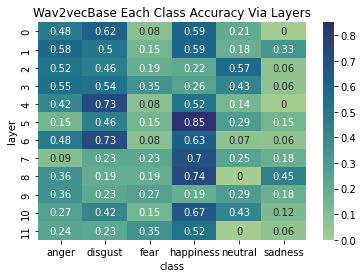

In [7]:
import seaborn as sns

sns.heatmap(newdf2, annot=True, cmap="crest").set(title="Wav2vecBase Each Class Accuracy Via Layers")

In [8]:
df = pd.DataFrame()
BASE_DIR = "/content/drive/MyDrive/MESD/results/"

hubert_accu = []
wav2vec_accu = []
for layer in range(layers):
    hubert_file = BASE_DIR + f'hubertbase_{layer}.csv '
    data = pd.read_csv(hubert_file)
    accu_max = round(max(data["valid_accu"]), 4)
    hubert_accu.append(accu_max)

    wav2vec_file = BASE_DIR + f'wav2vecbase_{layer}.csv '
    data = pd.read_csv(wav2vec_file)
    accu_max = round(max(data["valid_accu"]), 4)
    wav2vec_accu.append(accu_max)

In [9]:
print(hubert_accu)
print(wav2vec_accu)

[0.8035, 0.8092, 0.7746, 0.7688, 0.7283, 0.7052, 0.711, 0.6532, 0.6127, 0.6069, 0.7052, 0.6532]
[0.8035, 0.8035, 0.7977, 0.7919, 0.7803, 0.7283, 0.7052, 0.711, 0.711, 0.7399, 0.6301, 0.6416]


In [10]:
df = pd.DataFrame({
    "HubertBase": hubert_accu,
    "Wav2VecBase": wav2vec_accu
})

In [11]:
df['layer'] = [i for i in range(12)]
df

,HubertBase,Wav2VecBase,layer
0,0.8035,0.8035,0
1,0.8092,0.8035,1
2,0.7746,0.7977,2
3,0.7688,0.7919,3
4,0.7283,0.7803,4
5,0.7052,0.7283,5
6,0.7110,0.7052,6
7,0.6532,0.7110,7
8,0.6127,0.7110,8
9,0.6069,0.7399,9


[Text(0.5, 1.0, 'Each Layer Classification Accuracy')]

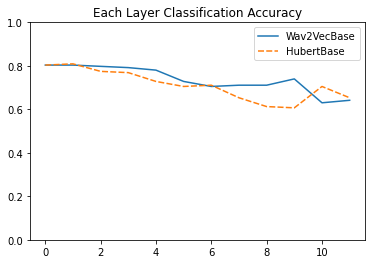

In [13]:
import matplotlib.pyplot as plt

plt.ylim(0, 1)
plt.legend()
sns.lineplot(data=df[['Wav2VecBase', 'HubertBase']]).set(title='Each Layer Classification Accuracy')